# <font color='blue'>AVALIAÇÃO BANCO PARANÁ - PABLO KUNZ DE JESUS</font>



## TAREFAS:
1. Faça uma análise inicial dos dados: você encontrou algum problema? Como você trataria estes problemas?
2. Faça uma análise exploratória dos dados: distribuições de variáveis, outliers, correlações, etc.
3. Faça uma projeção do crescimento da carteira para os próximos 2 anos em termos de volume de operações e da carteira utilizando os métodos de ciência de dados que julgar mais adequados para essa tarefa.


### Importando os pacotes a serem utilizados



In [182]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
#pip i nstall -U nome_do_pacote

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [183]:
# Importando bibliotecas utilizadas
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import RandomOverSampler
import sklearn
import matplotlib
import warnings
#warnings.filterwarnings("ignore")
#warnings.filterwarnings('ignore', category=DeprecationWarning)

## Carga dos Dados

In [184]:
# Carregar os dados do arquivo CSV
df_original = pd.read_csv( 'C:/Users/pablo/OneDrive/Área de Trabalho/WORKs/Banco Paraná/AVALIACAO/EX/CLASSIFICACAO/dados_operacoes.csv', sep=',', header=0, encoding='utf8')

# <font color='blue'>TAREFA 1</font>: Análise Inicial dos dados

## Problemas encontrados:
1.Tipos de dados precisam ser adequados para algumas variáveis como, por exemplo idade. Porém idade também possui valores nulos, que serão substituidos pela mediana dos valores não nulos. 
2. A variável genero também possui dados nulos e além disso está desbalanceada. Como não temos o nome no banco de dados, vamso substituir pela moda. 

In [185]:
# Shape dos dados
df_original.shape

(14895, 24)

In [186]:
# Exibindo as primeiras linhas do DataFrame
df_original.head()

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,Null,Null,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Null,Null,...,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000


In [187]:
# Tipos de Dados
df_original.dtypes

id                            object
contrato                       int64
data_operacao                 object
nascimento                    object
idade                         object
genero                        object
bairro                        object
cidade                        object
estado                        object
cep                           object
telefone                      object
cartao                        object
email                         object
ocupacao                      object
empregador                    object
operacao                      object
valor_principal              float64
parcelas                       int64
quantidade_parcelas            int64
parcelas_pagas                 int64
quantidade_parcelas_pagas      int64
taxa_contrato                float64
valor_parcela                float64
valor_bruto                  float64
dtype: object

In [188]:
# Verificando Valores Únicos
df_original.nunique()

id                            4998
contrato                     14895
data_operacao                 1457
nascimento                    4099
idade                           34
genero                           3
bairro                         483
cidade                        1533
estado                          28
cep                           1782
telefone                      4285
cartao                        3910
email                         5957
ocupacao                       747
empregador                    1597
operacao                         3
valor_principal              14875
parcelas                         6
quantidade_parcelas              6
parcelas_pagas                  37
quantidade_parcelas_pagas       37
taxa_contrato                14626
valor_parcela                14227
valor_bruto                  14571
dtype: int64

In [189]:
# Verificando Valores Únicos para a Idade
valores_distintos = df_original['idade'].unique()
print(valores_distintos)

['48' '34' 'Null' '40' '37' '38' '26' '25' '23' '50' '35' '45' '27' '42'
 '44' '47' '24' '51' '33' '21' '32' '52' '22' '36' '30' '31' '49' '28'
 '29' '46' '43' '41' '39' '53']


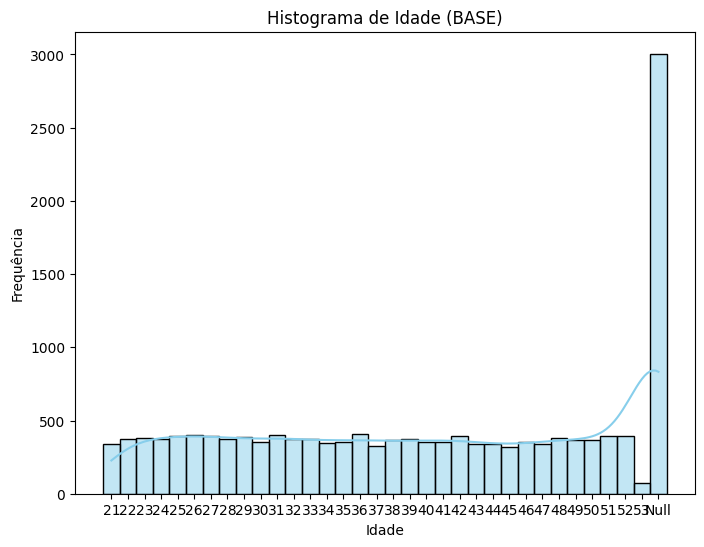

In [190]:
# Visualização: Histograma
# Ordenar os valores da coluna 'idade' em ordem crescente
idades_ordenadas = df_original['idade'].sort_values()

# Visualização: Histograma para a variável 'idade' em ordem crescente
plt.figure(figsize=(8, 6))
sns.histplot(idades_ordenadas, bins=10, kde=True, color='skyblue')
plt.title('Histograma de Idade (BASE)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [191]:
# Verificando Valores Únicos para o Genero
valores_distintos = df_original['genero'].unique()
print(valores_distintos)

['F' 'Null' 'M']


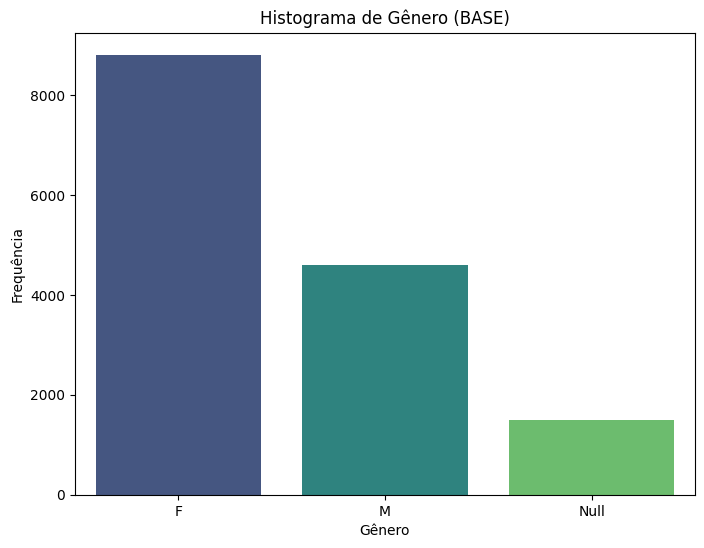

In [192]:
# Visualização: Histograma
# Contar as ocorrências de cada categoria de gênero
contagem_genero = df_original['genero'].value_counts()

# Visualização: Histograma para a variável 'genero'
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_genero.index, y=contagem_genero.values, hue=contagem_genero.index, palette='viridis', legend=False)
plt.title('Histograma de Gênero (BASE)')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

# Caso queira visualizar todas as colunas do DataFrame 
for coluna in df_original.columns:
    # Obter os valores únicos da coluna atual
    valores_unicos = df_original[coluna].unique()
    
    # Exibir os valores únicos da coluna
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

# Visualização: Histogramas para variáveis numéricas
numeric_columns = df_original.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_original[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

In [195]:
# Verificando valores missing
print(df_original.isnull().sum())

id                           0
contrato                     0
data_operacao                0
nascimento                   0
idade                        0
genero                       0
bairro                       0
cidade                       0
estado                       0
cep                          0
telefone                     0
cartao                       0
email                        0
ocupacao                     0
empregador                   0
operacao                     0
valor_principal              0
parcelas                     0
quantidade_parcelas          0
parcelas_pagas               0
quantidade_parcelas_pagas    0
taxa_contrato                0
valor_parcela                0
valor_bruto                  0
dtype: int64


In [196]:
# Removendo as linhas com valores missing
df_original.dropna(inplace = True)

In [197]:
# Estatísticas descritivas
df_original.describe()

,contrato,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
count,1.489500e+04,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000
mean,4.986736e+12,23185.875466,68.224236,68.224236,15.739040,15.739040,2.134701,724.267448,47446.568597
std,2.894235e+12,13500.843754,27.128264,27.128264,17.519803,17.519803,1.341172,515.074503,39877.201593
min,7.105632e+08,203.550000,40.000000,40.000000,0.000000,0.000000,0.347370,3.050000,252.400000
25%,2.466882e+12,12484.045000,40.000000,40.000000,6.000000,6.000000,1.023490,336.700000,20689.500000
50%,4.964680e+12,20256.790000,60.000000,60.000000,9.000000,9.000000,1.793700,601.640000,38220.000000
75%,7.513420e+12,34651.280000,90.000000,90.000000,18.000000,18.000000,3.019275,1007.655000,61545.198000
max,9.999785e+12,49995.020000,120.000000,120.000000,108.000000,108.000000,6.461680,3063.990000,367678.800000


##  Dicionário de Dados
Na tabela abaixo breve descrição e classificação das variáveis, e os respectivos tipos de dados originais e tipo de dados que serão modificados.
Obs.: As variaveis <font color='blue'>parcelas</font> e <font color='blue'>quantidade_parcelas</font> podem ser excluídas ou apenas mudar o tipo,
pois trazem a mesma informação, assim como <font color='blue'>parcelas_pagas</font> e <font color='blue'>quantidade_parcelas_pagas</font>.

| Variável                  | Quantitativa | Quantitativa | Qualitativa | Qualitativa | Tipo dado Original | Tipo dado Modificado |
|---------------------------|--------------|--------------|-------------|-------------|--------------------|----------------------|
|                           | Discreta     | Contínua     | Nominais    | Ordinais    |                    |                      |
| id                        | X            |              |             |             | object             | object               |
| contrato                  |              | X            |             |             | int64              | object               |
| data_operacao             |              | X            |             |             | object             | datetime64           |
| nascimento                |              |              |             |             | object             | datetime64           |
| idade                     | X            |              |             |             | object             | int64                |
| genero                    |              |              | X           |             | object             | object               |
| bairro                    |              |              | X           |             | object             | object               |
| cidade                    |              |              | X           |             | object             | object               |
| estado                    |              |              | X           |             | object             | object               |
| cep                       |              |              | X           |             | object             | object               |
| telefone                  |              |              | X           |             | object             | object               |
| cartao                    |              |              | X           |             | object             | object               |
| email                     |              |              | X           |             | object             | object               |
| ocupacao                  |              |              | X           |             | object             | object               |
| empregador                |              |              | X           |             | object             | object               |
| operacao                  |              |              | X           |             | object             | object               |
| valor_principal           |              | X            |             |             | float64            | float64              |
| parcelas                  | X            |              |             |             | int64              | int64                |
| quantidade_parcelas       |              |              |             | X           | int64              | object               |
| parcelas_pagas            | X            |              |             |             | int64              | int64                |
| quantidade_parcelas_pagas |              |              |             | X           | int64              | object               |
| taxa_contrato             |              | X            |             |             | float64            | float64              |
| valor_parcela             |              | X            |             |             | float64            | float64              |
| valor_bruto               |              | X            |             |             | float64            | float64              |


# <font color='blue'>TAREFA 2</font>: Análise exploratória dos dados


In [198]:
# Converter a coluna 'contrato' para texto
df_original['contrato'] = df_original['contrato'].astype(object)
# Converter as colunas 'data_operacao' e 'nascimento' para o tipo datetime
df_original['data_operacao'] = pd.to_datetime(df_original['data_operacao'])
df_original['nascimento'] = pd.to_datetime(df_original['nascimento'])

In [199]:
# Estatísticas descritivas
df_original.describe()

,data_operacao,nascimento,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
count,14895,14895,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000
mean,2021-03-19 01:18:01.087613184,1986-02-28 07:51:41.148036288,23185.875466,68.224236,68.224236,15.739040,15.739040,2.134701,724.267448,47446.568597
min,2019-01-01 00:00:00,1970-01-03 00:00:00,203.550000,40.000000,40.000000,0.000000,0.000000,0.347370,3.050000,252.400000
25%,2020-03-30 00:00:00,1978-01-24 12:00:00,12484.045000,40.000000,40.000000,6.000000,6.000000,1.023490,336.700000,20689.500000
50%,2021-05-12 00:00:00,1986-05-07 00:00:00,20256.790000,60.000000,60.000000,9.000000,9.000000,1.793700,601.640000,38220.000000
75%,2022-03-14 00:00:00,1994-04-23 00:00:00,34651.280000,90.000000,90.000000,18.000000,18.000000,3.019275,1007.655000,61545.198000
max,2022-12-30 00:00:00,2001-12-22 00:00:00,49995.020000,120.000000,120.000000,108.000000,108.000000,6.461680,3063.990000,367678.800000
std,NaN,NaN,13500.843754,27.128264,27.128264,17.519803,17.519803,1.341172,515.074503,39877.201593


###  Tratamento da variável idade 
Calcula mediana das idades, preenche  os valores nulos na coluna 'idade' com a mediana e salva o tratamento da idade em uma nova coluna chamada 'idade_tratada'.

In [226]:
# Calcula a mediana da idade tratada -> Validação
mediana_idade = df_original['idade_tratada'].median()
print("Mediana da Idade Tratada:", mediana_idade)

Mediana da Idade Tratada: 36.0


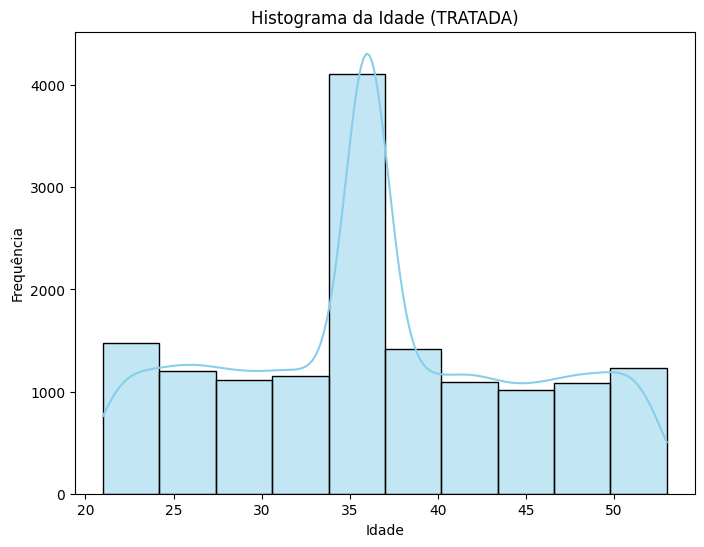

In [201]:
# Calcular a mediana das idades
mediana_idade = pd.to_numeric(df_original['idade'], errors='coerce').median()

# Preencher os valores nulos na coluna 'idade' com a mediana
df_original['idade_tratada'] = pd.to_numeric(df_original['idade'], errors='coerce').fillna(mediana_idade)

# Salvar o tratamento da idade em uma nova coluna
df_original['idade_tratada'] = df_original['idade_tratada']

# Ordenar os valores da coluna 'idade_tratada' de forma crescente
idade_ordenada = df_original['idade_tratada'].sort_values()

# Plotar histograma da idade tratada ordenada
plt.figure(figsize=(8, 6))
sns.histplot(idade_ordenada, bins=10, kde=True, color='skyblue')
plt.title('Histograma da Idade (TRATADA)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


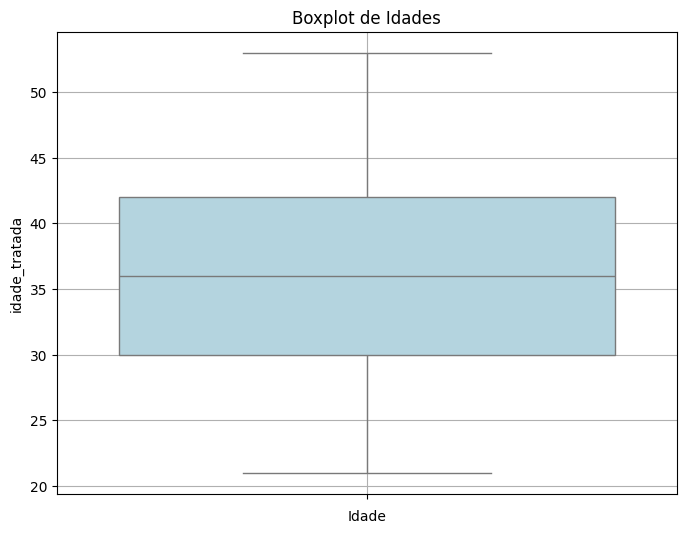

In [202]:
# Boxplot das idades
plt.figure(figsize=(8, 6))
sns.boxplot(idade_ordenada, color='lightblue')
plt.title('Boxplot de Idades')
plt.xlabel('Idade')
plt.grid(True)
plt.show()


In [203]:
# Exibindo as primeiras linhas do DataFrame
df_original.head()

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto,idade_tratada
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000,48.0
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000,34.0
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,Null,Null,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000,36.0
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Null,Null,...,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997,40.0
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000,37.0


In [204]:
# Tipos de Dados
df_original.dtypes

id                                   object
contrato                             object
data_operacao                datetime64[ns]
nascimento                   datetime64[ns]
idade                                object
genero                               object
bairro                               object
cidade                               object
estado                               object
cep                                  object
telefone                             object
cartao                               object
email                                object
ocupacao                             object
empregador                           object
operacao                             object
valor_principal                     float64
parcelas                              int64
quantidade_parcelas                   int64
parcelas_pagas                        int64
quantidade_parcelas_pagas             int64
taxa_contrato                       float64
valor_parcela                   

In [205]:
# Verificando Valores Únicos para a Idade
valores_distintos = df_original['idade_tratada'].unique()
print(valores_distintos)

[48. 34. 36. 40. 37. 38. 26. 25. 23. 50. 35. 45. 27. 42. 44. 47. 24. 51.
 33. 21. 32. 52. 22. 30. 31. 49. 28. 29. 46. 43. 41. 39. 53.]


###  Tratamento da variável genero
Este código filtra o DataFrame original para manter apenas as categorias 'F' e 'M' na coluna 'genero_tratado', e então aplica o oversampling apenas nessas categorias.


genero_tratado
F    8813
M    8813
Name: count, dtype: int64


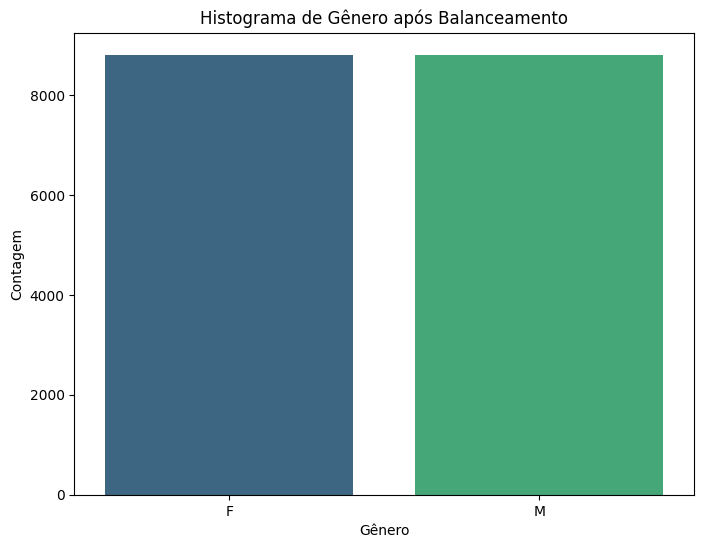

In [211]:
# Tratamento do gênero: preencher valores nulos com 'Não informado'
df_original['genero_tratado'] = df_original['genero'].fillna('Não informado')

# Filtrar o DataFrame para manter apenas 'F' e 'M' na coluna 'genero_tratado'
df_filtered = df_original[df_original['genero_tratado'].isin(['F', 'M'])]

# Aplicar oversampling na coluna 'genero_tratado'
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_filtered[['idade_tratada']], df_filtered['genero_tratado'])

# Criar novo DataFrame com os dados resampleados
df_resampled = pd.DataFrame(X_resampled, columns=['idade_tratada'])
df_resampled['genero_tratado'] = y_resampled

# Visualizar contagem das categorias após o balanceamento
print(df_resampled['genero_tratado'].value_counts())

# Visualização: Histograma para a variável 'genero' após balanceamento
plt.figure(figsize=(8, 6))
sns.countplot(x='genero_tratado', hue='genero_tratado', data=df_resampled, palette='viridis', legend=False)
plt.title('Histograma de Gênero após Balanceamento')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


In [207]:
# Tipos de Dados
df_original.dtypes

id                                   object
contrato                             object
data_operacao                datetime64[ns]
nascimento                   datetime64[ns]
idade                                object
genero                               object
bairro                               object
cidade                               object
estado                               object
cep                                  object
telefone                             object
cartao                               object
email                                object
ocupacao                             object
empregador                           object
operacao                             object
valor_principal                     float64
parcelas                              int64
quantidade_parcelas                   int64
parcelas_pagas                        int64
quantidade_parcelas_pagas             int64
taxa_contrato                       float64
valor_parcela                   

###  Correlação entre as variáveis numéricas

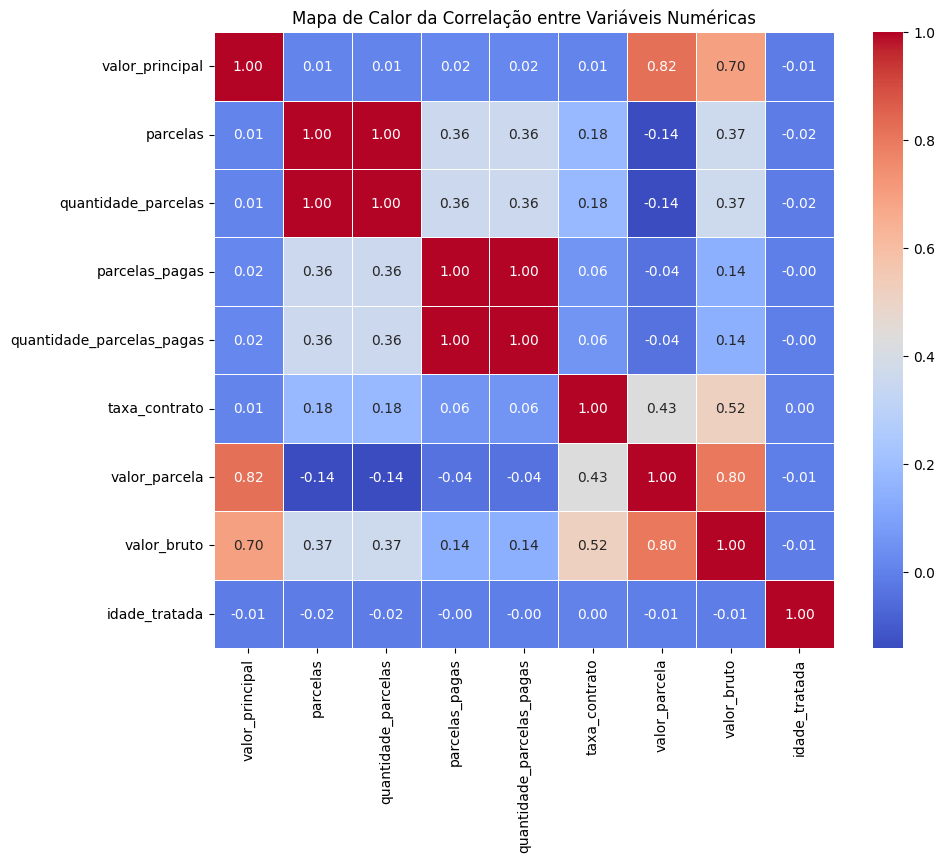

In [215]:
# Selecionar apenas as variáveis numéricas
numeric_columns = df_original.select_dtypes(include=['int64', 'float64'])

# Criar mapa de calor 
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

###  Estudo e tratamento de Outliers


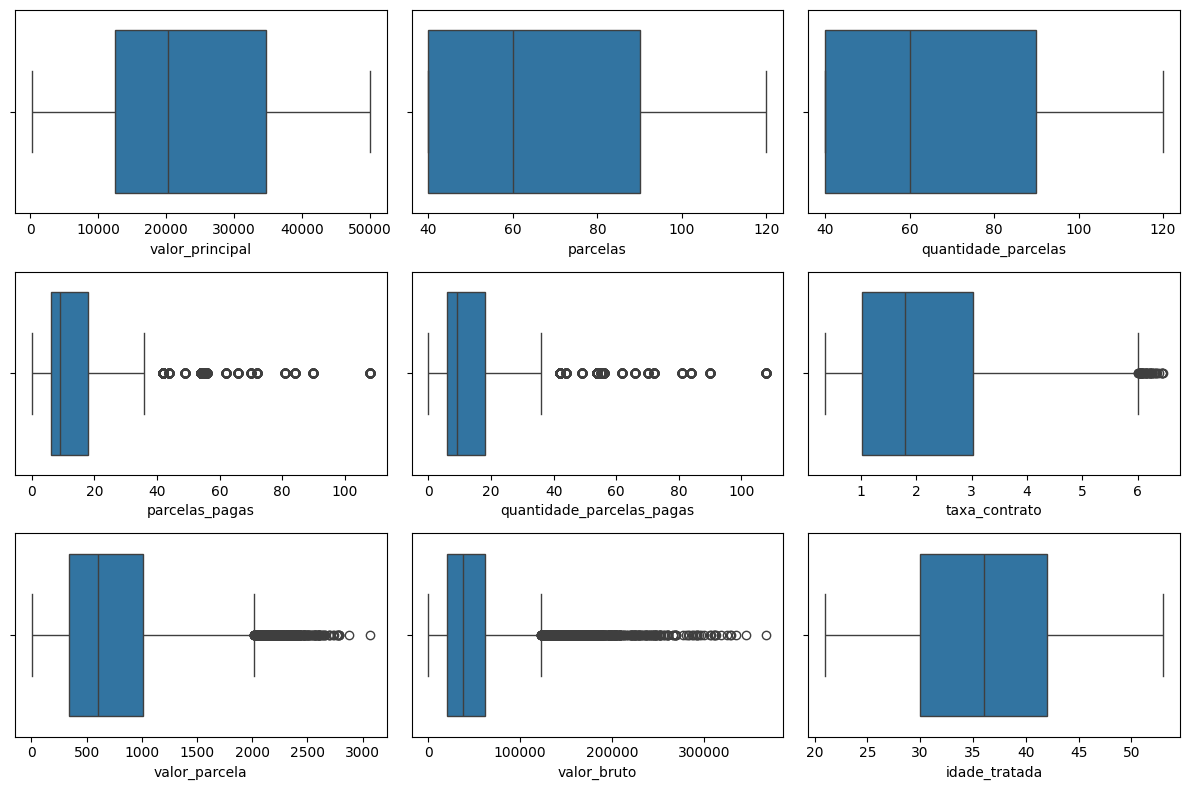

In [223]:
# Separar variáveis numéricas e categóricas
numericas = df_original.select_dtypes(include=['int64', 'float64'])
categoricas = df_original.select_dtypes(include=['object'])

# Plot das variáveis contínuas
# Tamanho da área de plotagem
fig = plt.figure(figsize=(12, 8))

# Loop pelas variáveis numéricas
for i, col in enumerate(numericas.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_original[col])
    plt.tight_layout()

# Salvar a imagem dos BoxPlots
plt.savefig('boxplot1.png')

<p> Observe que Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log (logaritmo) para melhor visualização desses dados.

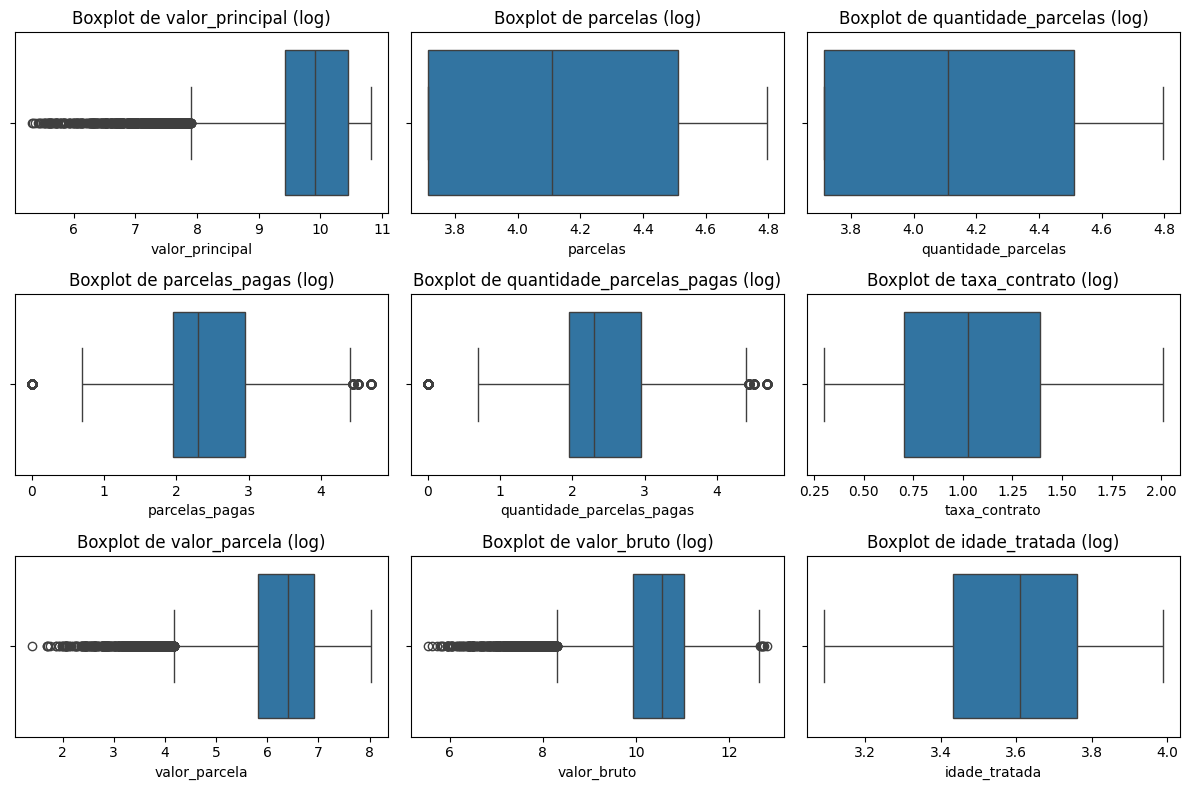

In [232]:
# Aplicar a transformação logarítmica em variáveis numéricas
numericas_log = numericas.apply(lambda x: np.log(x + 1))

# Tamanho da área de plotagem
fig = plt.figure(figsize=(12, 8))

# Loop pelas variáveis numéricas transformadas
for i, col in enumerate(numericas_log.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=numericas_log[col])
    plt.title(f'Boxplot de {col} (log)')
    plt.tight_layout()

# Salvar a imagem dos BoxPlots
plt.savefig('boxplot_log.png')

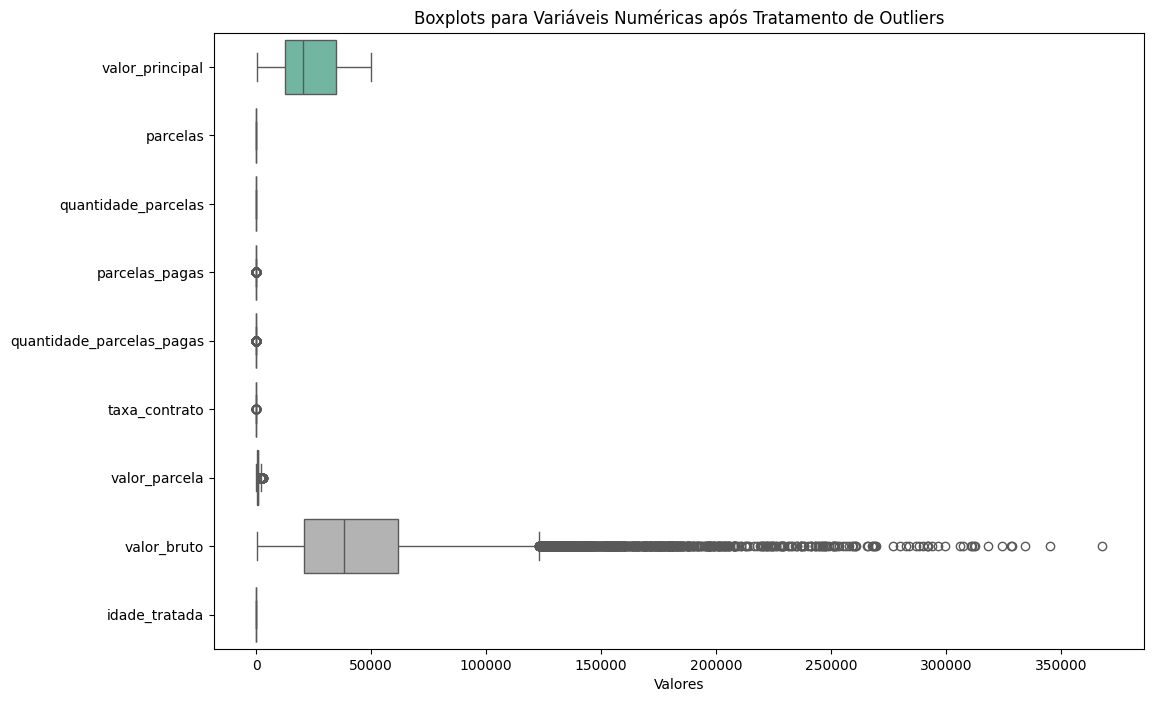

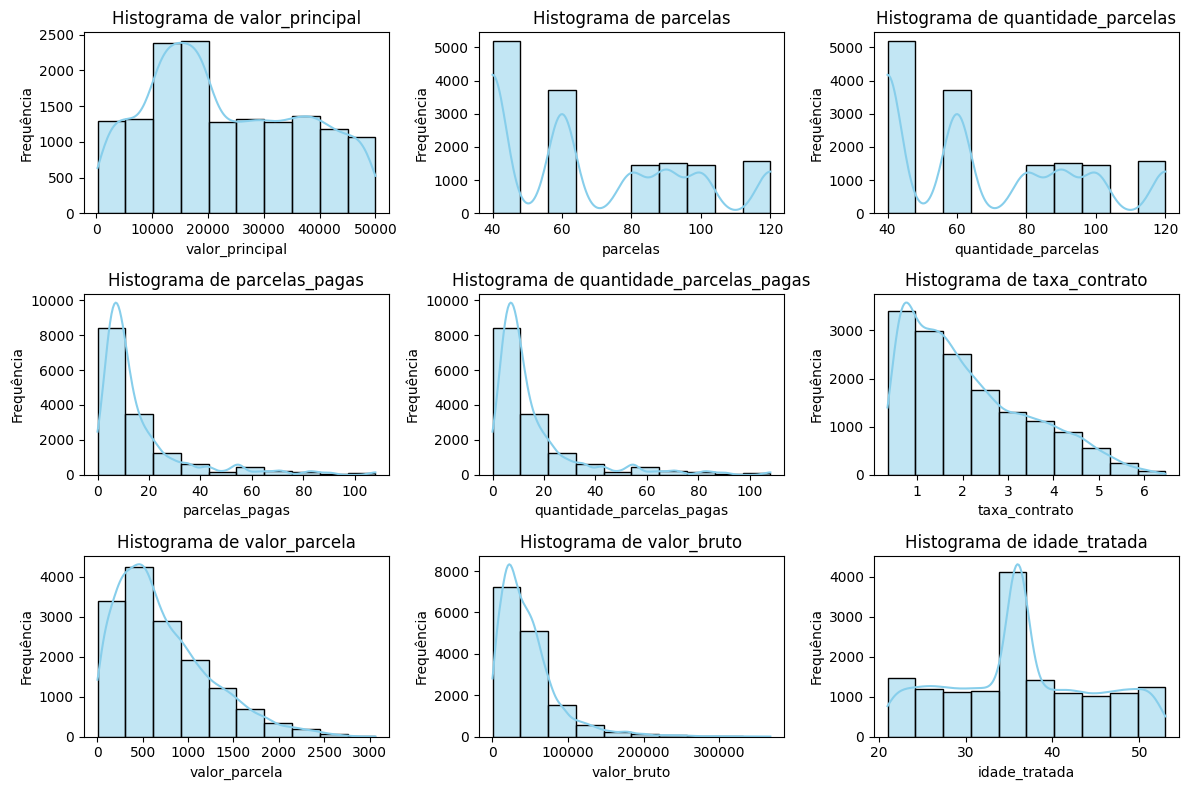

In [233]:
# Visualização: Boxplots para as variáveis numéricas após o tratamento dos outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_original.select_dtypes(include=['int64', 'float64']), orient="h", palette="Set2")
plt.title('Boxplots para Variáveis Numéricas após Tratamento de Outliers')
plt.xlabel('Valores')
plt.show()

# Visualização: Histogramas para as variáveis numéricas após o tratamento dos outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_original.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_original[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


O algoritmo Isolation Forest detecta e remove outliers nos dados do valor_bruto. Este é eficaz na detecção de outliers em conjuntos de dados de alta dimensionalidade e pode ser uma boa opção para lidar com casos onde os métodos tradicionais não são suficientes.

C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


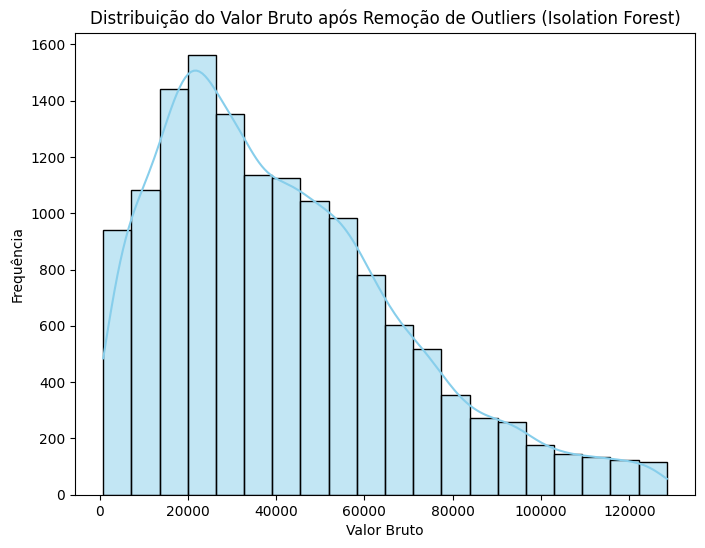

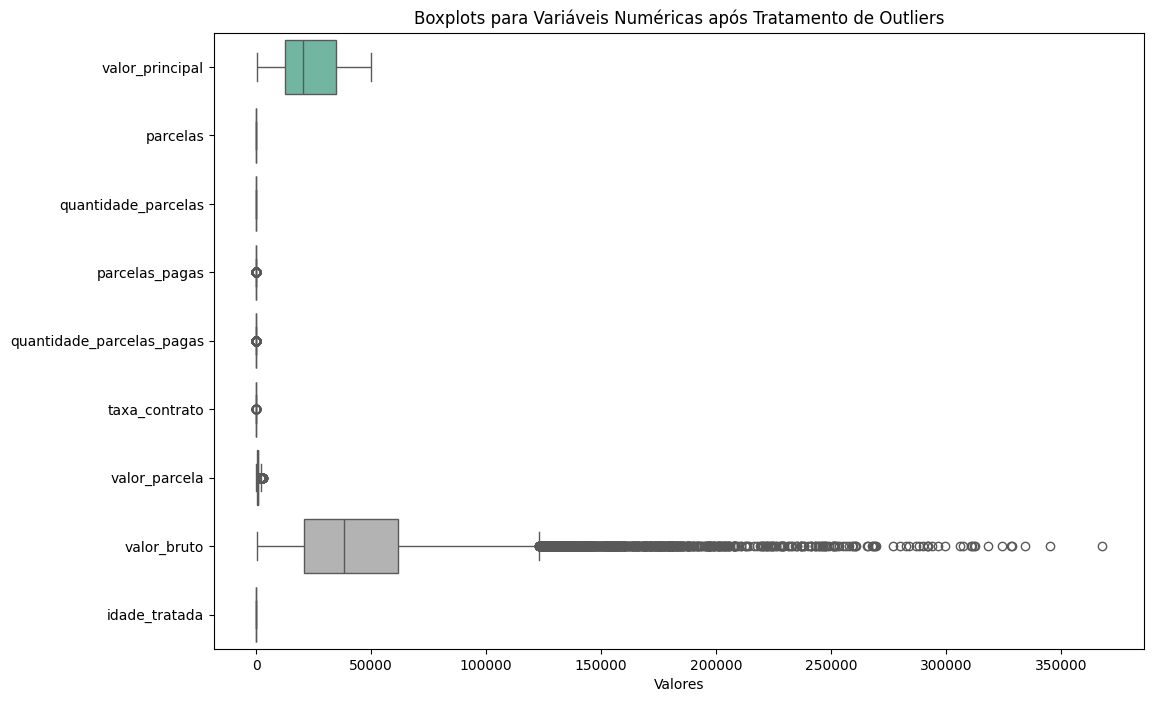

In [231]:
from sklearn.ensemble import IsolationForest

# Criar uma cópia dos dados originais para evitar alterações indevidas
df_outliers = df_original.copy()

# Selecionar apenas a coluna de valor bruto para detecção de outliers
X = df_outliers[['valor_bruto']]

# Inicializar e ajustar o modelo Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Identificar os outliers com base nas previsões do modelo
outliers = isolation_forest.predict(X)

# Remover os outliers identificados
df_outliers['outlier'] = outliers
df_outliers = df_outliers[df_outliers['outlier'] == 1]

# Visualizar a distribuição do valor bruto após a remoção dos outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_outliers['valor_bruto'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Valor Bruto após Remoção de Outliers (Isolation Forest)')
plt.xlabel('Valor Bruto')
plt.ylabel('Frequência')
plt.show()

# Visualização: Boxplots para as variáveis numéricas após o tratamento dos outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_original.select_dtypes(include=['int64', 'float64']), orient="h", palette="Set2")
plt.title('Boxplots para Variáveis Numéricas após Tratamento de Outliers')
plt.xlabel('Valores')
plt.show()

# <font color='blue'>TAREFA 3</font>: Projeção do Crescimento da Carteira

Escolhi esses modelos por serem amplamente utilizados em previsão de séries temporais e por terem diferentes abordagens e capacidades de lidar com diferentes tipos de padrões nos dados. Aqui está uma breve explicação de por que escolhi cada um deles:

ARIMA (Médias Móveis Integradas Autoregressivas): É um modelo clássico de previsão de séries temporais que é capaz de lidar com tendências e sazonalidades nos dados.

SARIMA (Seasonal ARIMA): É uma extensão do modelo ARIMA que leva em conta a sazonalidade nos dados. É útil quando os dados apresentam padrões sazonais.

Exponential Smoothing (ETS): É um método que suaviza os dados observados para prever futuros valores. Ele é capaz de lidar com tendências e sazonalidades, e é especialmente útil quando os padrões nos dados mudam ao longo do treferência.

Escolhi esses modelos porque eles oferecem uma variedade de abordagens para modelar diferentes tipos de padrões nos dados e fornecem uma base sólida para comparar o desempenho de diferentes métodos

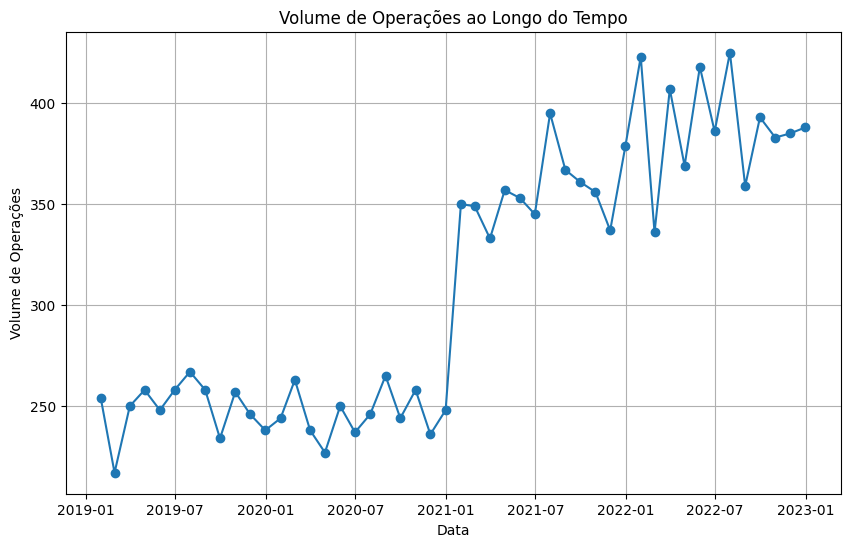

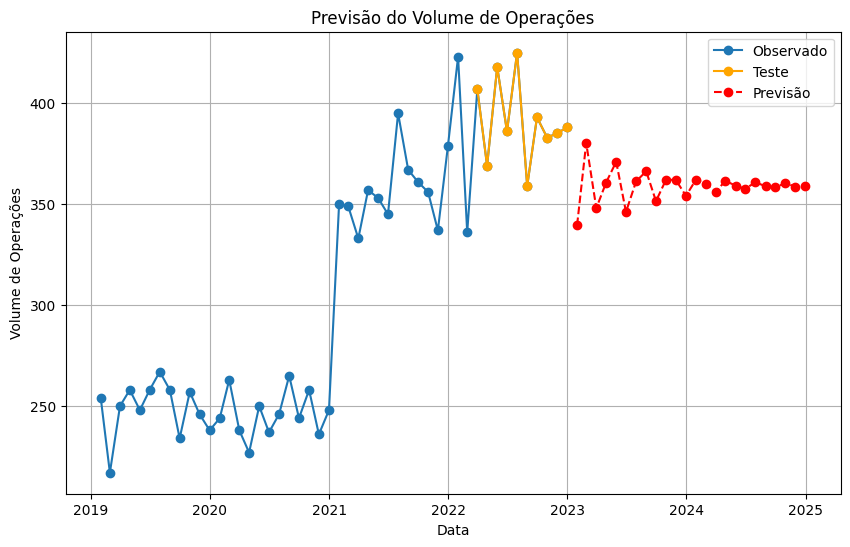

Erro médio quadrático (RMSE): 40.45001481357185


In [248]:
# Converter a coluna 'data_operacao' para o tipo datetime
df_original['data_operacao'] = pd.to_datetime(df_original['data_operacao'])

# Agregar os dados para obter o volume de operações por mês
df_volume_operacoes = df_original.groupby(pd.Grouper(key='data_operacao', freq='M')).size().reset_index(name='volume_operacoes')

# Renomear colunas
df_volume_operacoes.rename(columns={'data_operacao': 'data', 'volume_operacoes': 'volume'}, inplace=True)

# Definir a data como índice
df_volume_operacoes.set_index('data', inplace=True)

# Visualizar a série temporal do volume de operações
plt.figure(figsize=(10, 6))
plt.plot(df_volume_operacoes.index, df_volume_operacoes['volume'], marker='o')
plt.title('Volume de Operações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volume de Operações')
plt.grid(True)
plt.show()

# Dividir os dados em conjunto de treinamento e teste
train_size = int(len(df_volume_operacoes) * 0.8)
train, test = df_volume_operacoes[:train_size], df_volume_operacoes[train_size:]

# Ajustar o modelo ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Fazer previsões para os próximos 24 meses
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Visualizar as previsões
plt.figure(figsize=(10, 6))
plt.plot(df_volume_operacoes.index, df_volume_operacoes['volume'], label='Observado', marker='o')
plt.plot(test.index, test['volume'], label='Teste', color='orange', marker='o')
plt.plot(pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Previsão', color='red', linestyle='--', marker='o')
plt.title('Previsão do Volume de Operações')
plt.xlabel('Data')
plt.ylabel('Volume de Operações')
plt.legend()
plt.grid(True)
plt.show()

# Calcular o erro médio quadrático (RMSE) para avaliar o desempenho do modelo
mse = mean_squared_error(test, forecast[:len(test)])
print(f"Erro médio quadrático (RMSE): {np.sqrt(mse)}")


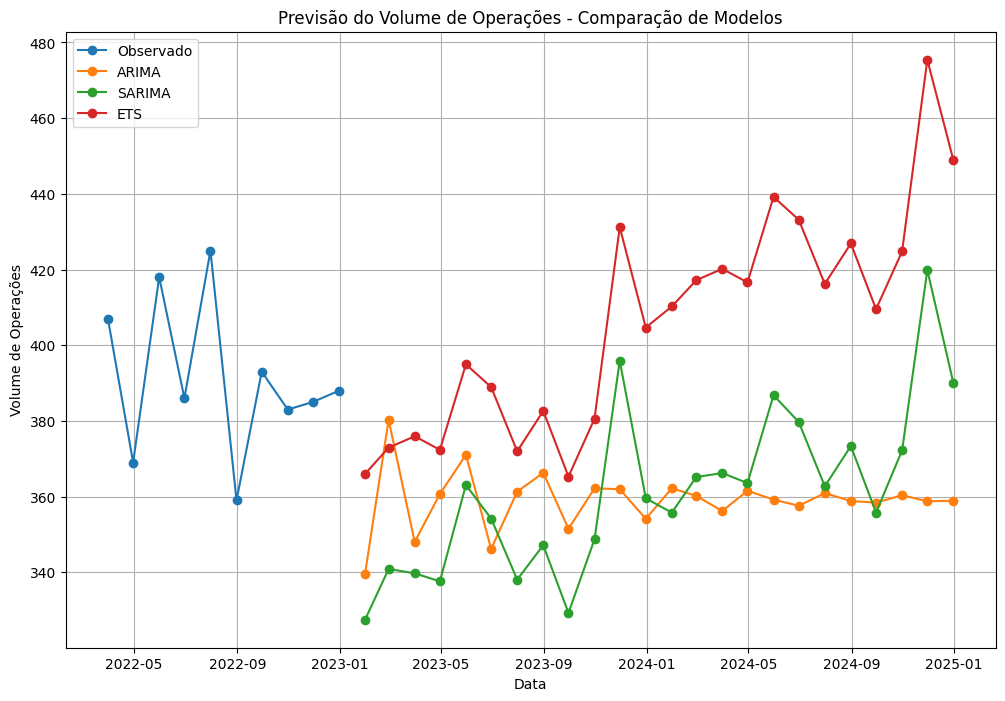

ARIMA: RMSE = 40.45001481357185
SARIMA: RMSE = 53.29747509035943
ETS: RMSE = 25.172329698653723


In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Função para calcular RMSE
def calculate_rmse(actual, forecast):
    return np.sqrt(mean_squared_error(actual, forecast))

# Converter a coluna 'data_operacao' para o tipo datetime
df_original['data_operacao'] = pd.to_datetime(df_original['data_operacao'])

# Agregar os dados para obter o volume de operações por mês
df_volume_operacoes = df_original.groupby(pd.Grouper(key='data_operacao', freq='M')).size().reset_index(name='volume_operacoes')

# Renomear colunas
df_volume_operacoes.rename(columns={'data_operacao': 'data', 'volume_operacoes': 'volume'}, inplace=True)

# Definir a data como índice
df_volume_operacoes.set_index('data', inplace=True)

# Dividir os dados em conjunto de treinamento e teste
train_size = int(len(df_volume_operacoes) * 0.8)
train, test = df_volume_operacoes[:train_size], df_volume_operacoes[train_size:]

# Ajustar modelos
forecast_steps = 24
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=forecast_steps)

model_ets = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
model_ets_fit = model_ets.fit()
forecast_ets = model_ets_fit.forecast(steps=forecast_steps)

# Calcular RMSE para cada modelo
rmse_scores = {}
models = {
    'ARIMA': forecast_arima,
    'SARIMA': forecast_sarima,
    'ETS': forecast_ets
}
for model_name, forecast in models.items():
    rmse_scores[model_name] = calculate_rmse(test, forecast[:len(test)])

# Visualizar previsões de todos os modelos em um único gráfico
plt.figure(figsize=(12, 8))
plt.plot(test.index, test['volume'], label='Observado', marker='o')

for model_name, forecast in models.items():
    plt.plot(pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label=model_name, marker='o')

plt.title('Previsão do Volume de Operações - Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Volume de Operações')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir RMSE de cada modelo
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: RMSE = {rmse}")
